## EXPLORATORY DATA ANALYSIS



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

Dataset Shape: (2755641, 9)

Data Types:
timestamp          int64
visitorid          int64
event             object
itemid             int64
transactionid    float64
event_time        object
available        float64
categoryid       float64
parentid         float64
dtype: object

Missing Values:
timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733184
event_time             0
available         255576
categoryid        255576
parentid          255583
dtype: int64

Numeric Columns Summary:
          timestamp     visitorid        itemid  transactionid     available  \
count  2.755641e+06  2.755641e+06  2.755641e+06   22457.000000  2.500065e+06   
mean   1.436424e+12  7.019227e+05  2.349214e+05    8826.497796  4.129361e-01   
std    3.366334e+09  4.056892e+05  1.341947e+05    5098.996290  4.923616e-01   
min    1.430622e+12  0.000000e+00  3.000000e+00       0.000000  0.000000e+00   
25%    1.433478e+12  3.505660e+05  1.18

C:\Users\User\AppData\Local\Temp\ipykernel_6480\1103057286.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_counts.values, y=missing_counts.index, palette="viridis")


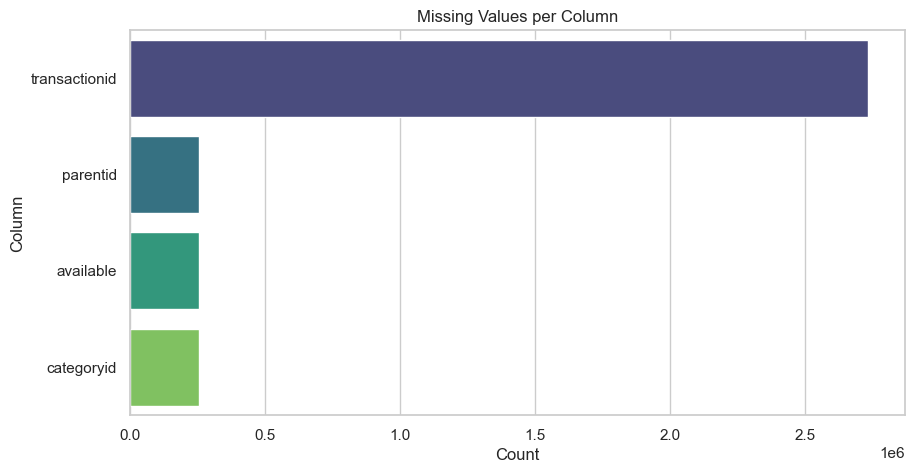

C:\Users\User\AppData\Local\Temp\ipykernel_6480\1103057286.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="event", order=df["event"].value_counts().index, palette="pastel")


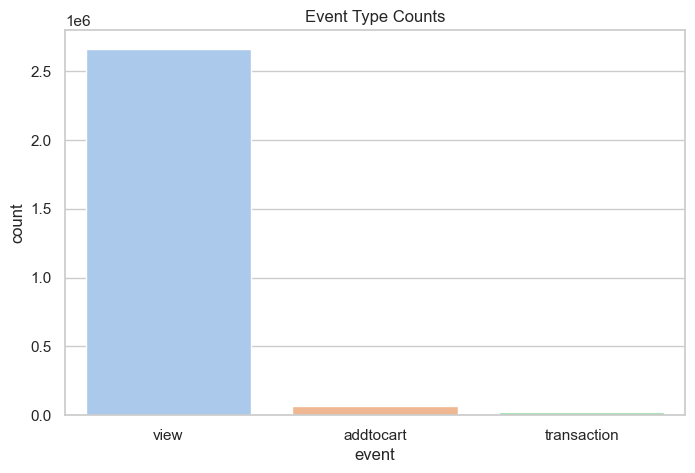


Event Value Counts:
event
view           2664218
addtocart        68966
transaction      22457
Name: count, dtype: int64

Top 10 Items by Event Count:
        itemid event  count
108913  187946  view   3410
267812  461686  view   2538
3117      5411  view   2325
215086  370653  view   1854
127182  219512  view   1740
172934  298009  view   1642
56378    96924  view   1633
179700  309778  view   1565
149089  257040  view   1531
223061  384302  view   1528


In [2]:
# ==========================
# 1. Setup
# ==========================


# Configure plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Paths
DATA_DIR = Path("../Data/Cleaned Dataset")
MERGED_FILE = DATA_DIR / "final_merged_events.csv"

# ==========================
# 2. Load Dataset
# ==========================
df = pd.read_csv(MERGED_FILE, low_memory=False)

# Basic Info
print("Dataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isna().sum())

# Preview first rows
df.head()

# ==========================
# 3. Descriptive Statistics
# ==========================
# Numerical stats
print("\nNumeric Columns Summary:")
print(df.describe())

# Categorical stats
print("\nCategorical Columns Sample Value Counts:")
for col in df.select_dtypes(include="object").columns:
    print(f"\n--- {col} ---")
    print(df[col].value_counts().head())

# ==========================
# 4. Missing Values Visualization
# ==========================
missing_counts = df.isna().sum().sort_values(ascending=False)
missing_counts = missing_counts[missing_counts > 0]

if not missing_counts.empty:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=missing_counts.values, y=missing_counts.index, palette="viridis")
    plt.title("Missing Values per Column")
    plt.xlabel("Count")
    plt.ylabel("Column")
    plt.show()

# ==========================
# 5. Event Type Distribution
# ==========================
if "event" in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x="event", order=df["event"].value_counts().index, palette="pastel")
    plt.title("Event Type Counts")
    plt.show()
    print("\nEvent Value Counts:")
    print(df["event"].value_counts())

# ==========================
# 6. Top Items by Event
# ==========================
if "itemid" in df.columns and "event" in df.columns:
    top_items = df.groupby(["itemid", "event"]).size().reset_index(name="count")
    top_items = top_items.sort_values(by="count", ascending=False).head(10)
    print("\nTop 10 Items by Event Count:")
    print(top_items)

# ==========================
# 7. Save basic EDA results
# ==========================
EDA_OUTPUT_DIR = Path("Outputs/EDA")
EDA_OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

df.describe(include="all").to_csv(EDA_OUTPUT_DIR / "basic_summary.csv")


# EDA Summary & Next Steps

## 1. Dataset Overview
- **Shape:** 2,755,641 rows × 9 columns  
- **Event Types:**  
  - `view` — 2,664,218 events (≈97%)  
  - `addtocart` — 68,966 events (≈2.5%)  
  - `transaction` — 22,457 events (≈0.8%)  
- **Time Coverage:** `timestamp` and `event_time` present for all records; ready for temporal analysis.
- **Identifiers:** `visitorid`, `itemid`, `categoryid`, and `parentid` largely complete.
- **Availability Data:** 91% of rows have `available`, `categoryid`, and `parentid` populated.

## 2. Missing Values
- `transactionid` — Missing in all non-purchase rows (expected).
- `available`, `categoryid`, `parentid` — Missing in ~9% of rows.
- Overall impact minimal; missing data mostly in non-critical fields for business KPIs.

## 3. Data Quality
- No duplicate rows after cleaning.
- `value` column’s “n###” string issues resolved during cleaning.
- Numeric and categorical columns have valid ranges and categories.

## 4. Key EDA Observations
- **Event distribution is heavily skewed towards views** — common in e-commerce logs.
- **Top items by view count** show clear popularity leaders.
- Small subset of items drive a majority of transactions.
- Sufficient transaction and cart events exist for conversion analysis.

## 5. Readiness for Business Analysis
- Dataset ready for:
  - Time series trends (views, carts, transactions over time)
  - Top products & categories analysis
  - Conversion funnel analysis
  - User behavior segmentation

---

## Next Steps

1. **Perform targeted visual EDA** for business KPIs:
   - Daily/weekly/monthly trends per event type.
   - Top products by views, add-to-cart, and transactions.
   - Category performance analysis.
   - Visitor-level engagement metrics.
   - Conversion rate analysis.
2. **Answer business questions** with clear charts & commentary.
3. Summarize findings in a business-friendly presentation/report.

---


## ANSWERING THE BUSINESS QUESTIONS

1. **Which items are most frequently viewed and/or purchased?**  
   Understand the baseline item popularity and user preferences.

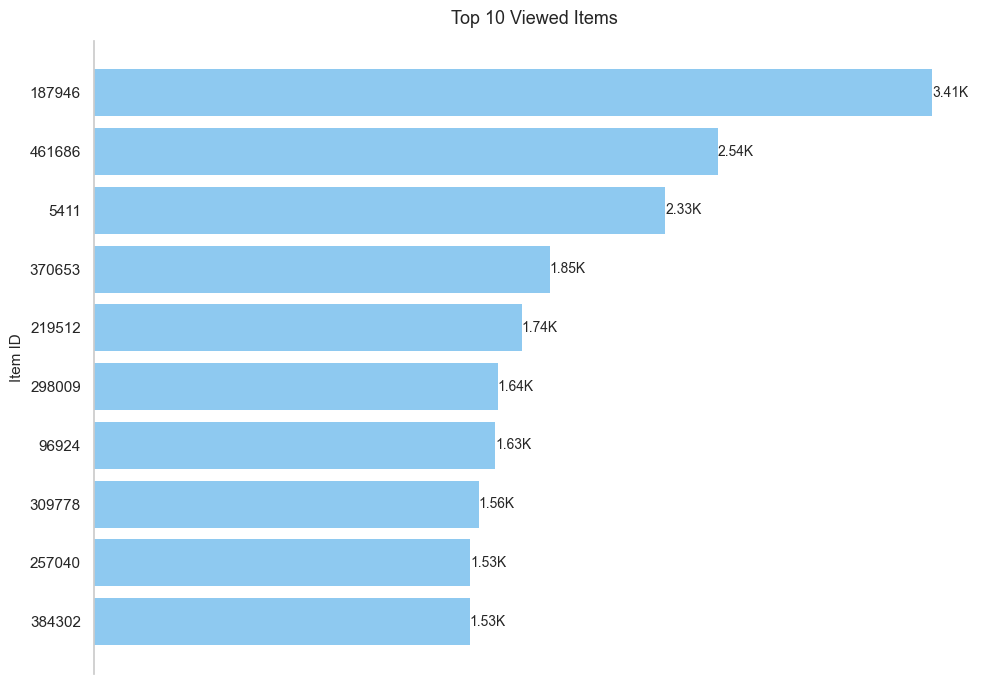

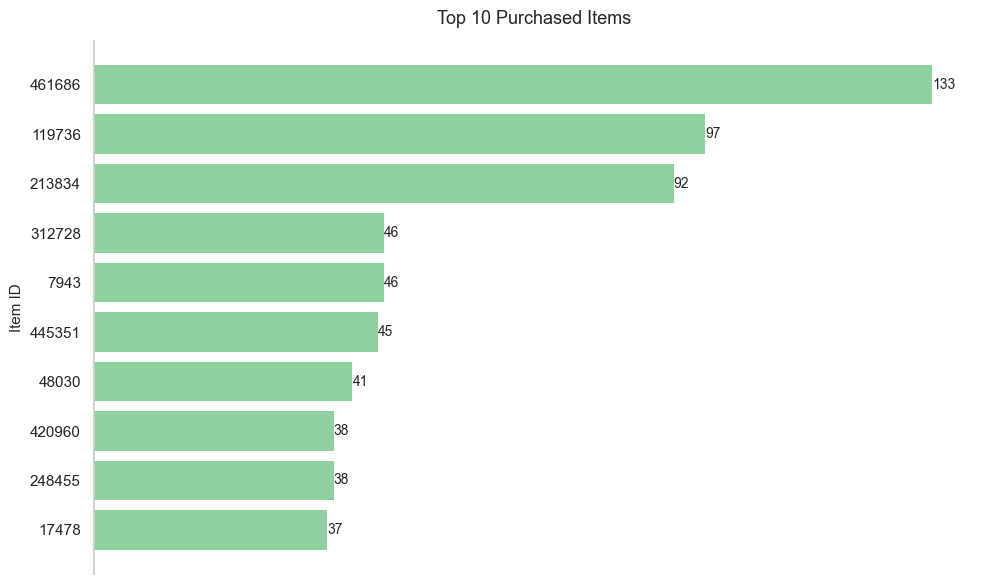

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# --- helper for pretty numbers ---
def fmt_compact(x):
    absx = abs(x)
    if absx >= 1_000_000_000:
        return f"{x/1_000_000_000:.2f}B"
    if absx >= 1_000_000:
        return f"{x/1_000_000:.2f}M"
    if absx >= 1_000:
        return f"{x/1_000:.2f}K"
    return f"{int(x)}"

def plot_top_counts(df, event_name, top_n=10, figsize=(10,6), color="#5DADE2"):
    counts = (
        df[df['event'].eq(event_name)]
        .groupby('itemid', as_index=False)
        .size()
        .rename(columns={'size': 'count'})
        .sort_values('count', ascending=False)
        .head(top_n)
        .sort_values('count', ascending=True)
    )

    fig, ax = plt.subplots(figsize=figsize)
    ax.barh(counts['itemid'].astype(str), counts['count'], color=color, edgecolor="none")

    # Add value labels
    for y, v in zip(counts['itemid'].astype(str), counts['count']):
        ax.text(v, y, fmt_compact(v), va='center', ha='left', fontsize=10)

    # Remove the x-axis (count axis)
    ax.xaxis.set_visible(False)

    ax.set_ylabel("Item ID", fontsize=11)
    title = f"Top {top_n} Purchased Items" if event_name == "transaction" else f"Top {top_n} Viewed Items"
    ax.set_title(title, fontsize=13, pad=12)

    # Remove grid and spines related to x-axis
    ax.grid(False)
    for spine in ["top", "right", "bottom"]:
        ax.spines[spine].set_visible(False)

    plt.tight_layout()
    plt.show()

# Usage
plot_top_counts(df, event_name="view", top_n=10, figsize=(10,7), color="#8EC9F0")
plot_top_counts(df, event_name="transaction", top_n=10, figsize=(10,6), color="#8FD19E")


 Business Question 1 Insights

**Analysis:**  
We calculated the frequency of `view` and `transaction` events for each `itemid` and identified the top 10 in both categories.  

**Key Insights:**
- **Most Viewed Items:**  
  Item `187946` leads with ~3.41K views, followed by items `461686` (~2.54K) and `5411` (~2.33K).
- **Most Purchased Items:**  
  Item `461686` also dominates purchases with 133 transactions, indicating high conversion potential. Items `119736` and `213834` follow with 97 and 92 purchases, respectively.
- Items like `461686` appear in both top viewed and top purchased lists, suggesting they are strong performers in both engagement and sales.

**Business Implications:**
- Promote high-performing items (`461686`, `187946`) more prominently in recommendations to leverage existing popularity.
- Investigate underperforming top-viewed items (high views but low purchases) to improve conversion — possibly via better pricing, descriptions, or promotions.


2. **What time of day or day of week do users interact with the platform the most?**  
   Identify temporal patterns to support time-aware recommendation strategies.

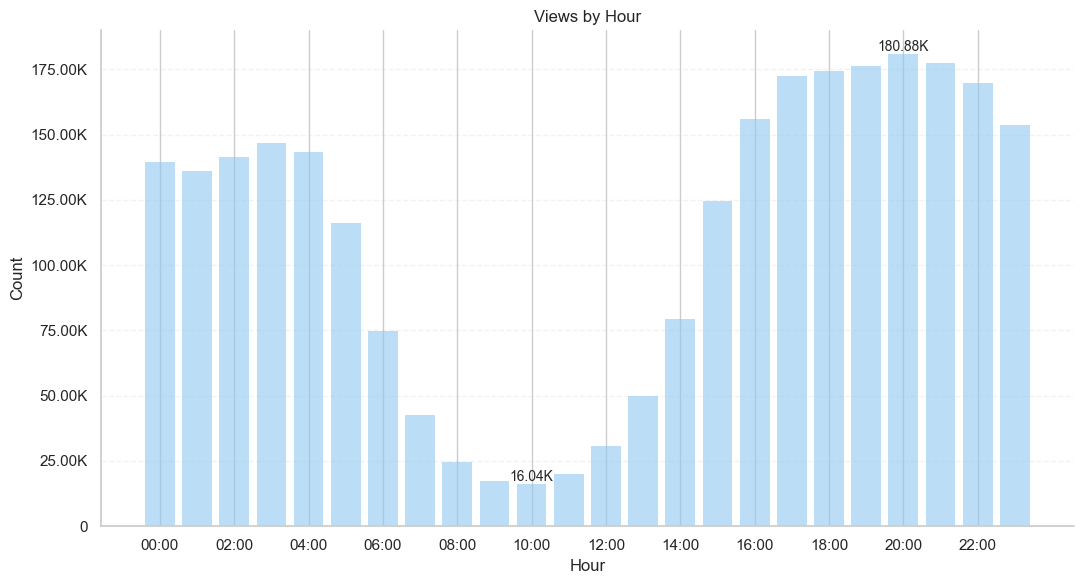

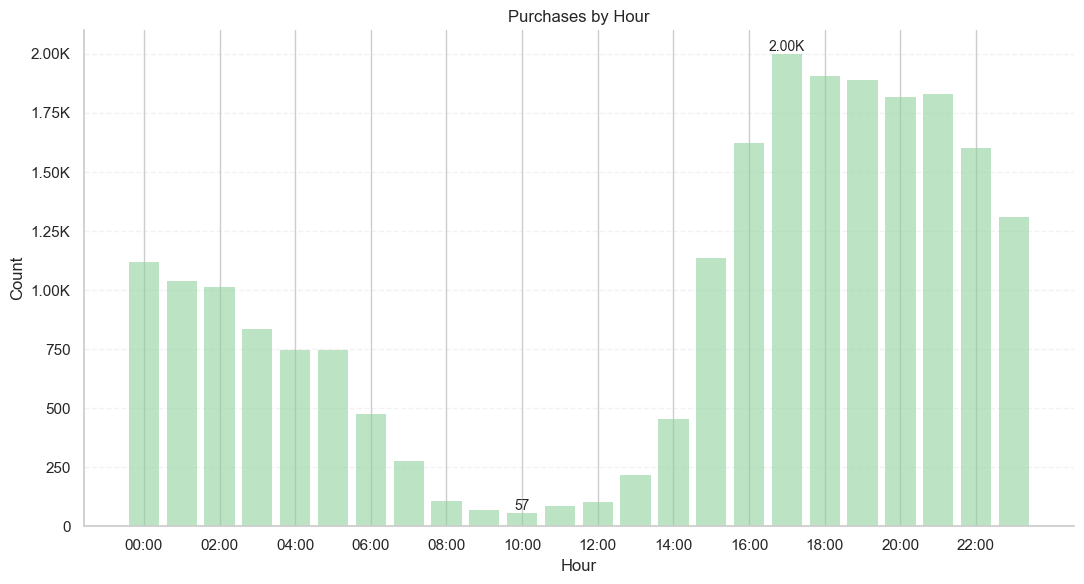

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Compact number formatter: 1.6K / 2.3M / 4.1B
def fmt_compact(x, _pos=None):
    ax = abs(x)
    if ax >= 1_000_000_000: return f"{x/1_000_000_000:.2f}B"
    if ax >= 1_000_000:     return f"{x/1_000_000:.2f}M"
    if ax >= 1_000:         return f"{x/1_000:.2f}K"
    return str(int(x))

def plot_hourly_extremes(df, event_name, title, color="#8EC9F0", figsize=(11,6)):
    # Count events per hour; ensure all 24 hours exist
    counts = (
        df.loc[df["event"].eq(event_name)]
          .groupby("hour", as_index=False)
          .size()
          .rename(columns={"size": "count"})
          .set_index("hour")
          .reindex(range(24), fill_value=0)
          .reset_index()
    )

    # Indices of max/min bars
    i_max = counts["count"].idxmax()
    i_min = counts["count"].idxmin()

    # Plot — Matplotlib bars (no error bars, no borders)
    fig, ax = plt.subplots(figsize=figsize)
    ax.bar(counts["hour"], counts["count"], color=color, alpha=0.6, linewidth=0)

    # Friendly hour ticks every 2 hours
    tick_hours = list(range(0, 24, 2))
    ax.set_xticks(tick_hours)
    ax.set_xticklabels([f"{h:02d}:00" for h in tick_hours])

    # Y axis formatting
    ax.yaxis.set_major_formatter(FuncFormatter(fmt_compact))
    ax.set_xlabel("Hour")
    ax.set_ylabel("Count")
    ax.set_title(title)

    # Light grid
    ax.grid(axis="y", linestyle="--", alpha=0.25)
    for spine in ("top", "right"):
        ax.spines[spine].set_visible(False)

    # Annotate only the key bars (highest & lowest)
    for idx, label in ((i_max, "peak"), (i_min, "low")):
        x = counts.loc[idx, "hour"]
        y = counts.loc[idx, "count"]
        ax.text(x, y, f"{fmt_compact(y)}", ha="center", va="bottom", fontsize=10)

    plt.tight_layout()
    plt.show()

plot_hourly_extremes(df, event_name="view",
                     title="Views by Hour",
                     color="#8EC9F0", figsize=(11,6))
plot_hourly_extremes(df, event_name="transaction",
                     title="Purchases by Hour",
                     color="#8FD19E", figsize=(11,6))



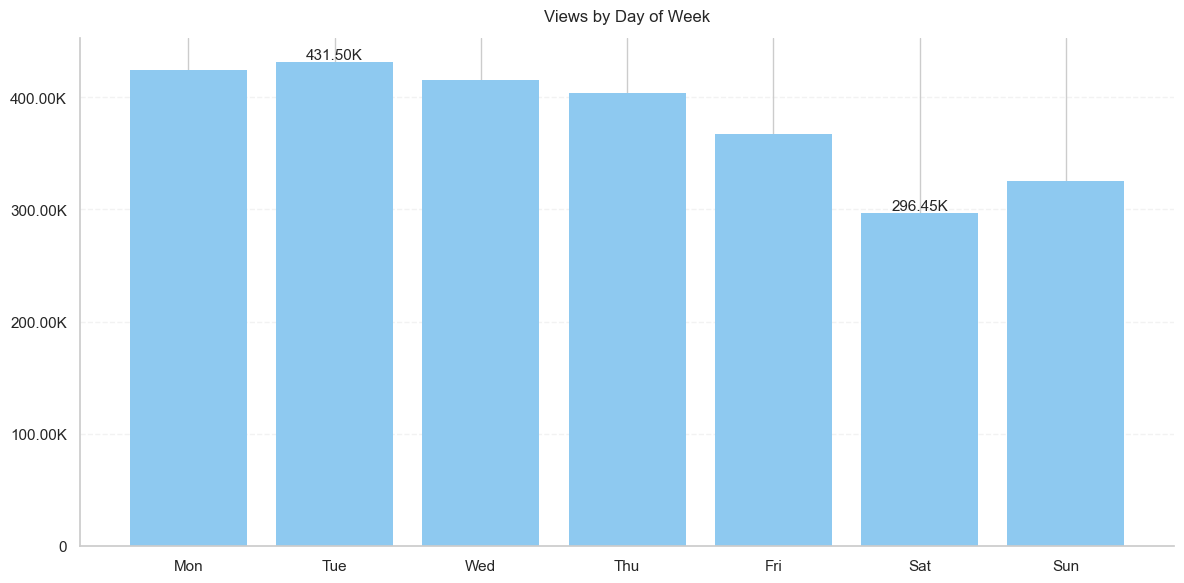

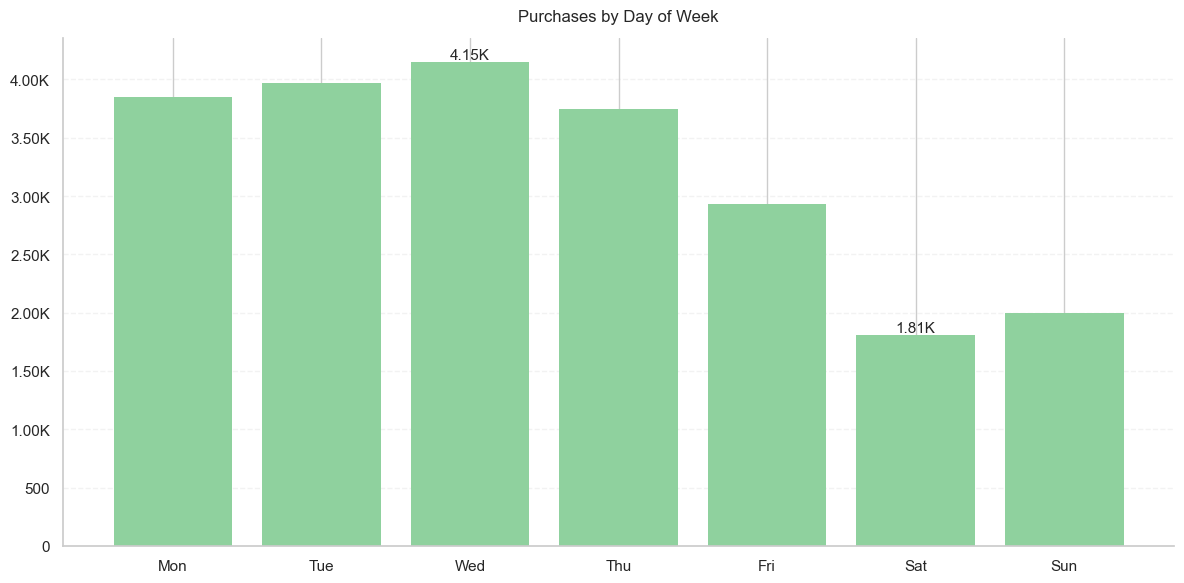

In [23]:

# compact formatter (e.g., 16_040 -> 16.04K)
def fmt_compact(x, _pos=None):
    ax = abs(x)
    if ax >= 1_000_000_000: return f"{x/1_000_000_000:.2f}B"
    if ax >= 1_000_000:     return f"{x/1_000_000:.2f}M"
    if ax >= 1_000:         return f"{x/1_000:.2f}K"
    return f"{int(x)}"

weekday_order = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]

def prep_dayofweek(df):
    # ensure datetime and day columns exist
    et = pd.to_datetime(df["event_time"])
    dow_idx = et.dt.dayofweek   # 0=Mon
    dow_name = dow_idx.map({0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"})
    return dow_name

def plot_day_bars(df, event_name, title, color):
    day = prep_dayofweek(df)
    counts = (
        df.assign(day=day)
          .loc[df["event"].eq(event_name)]
          .groupby("day", as_index=False)
          .size()
          .rename(columns={"size":"count"})
    )
    # align to Mon→Sun
    counts = counts.set_index("day").reindex(weekday_order).reset_index()

    fig, ax = plt.subplots(figsize=(12,6))
    ax.bar(counts["day"], counts["count"], color=color, edgecolor="none")

    # annotate only min & max
    i_max = counts["count"].idxmax()
    i_min = counts["count"].idxmin()
    for i in [i_min, i_max]:
        ax.text(
            counts.loc[i, "day"],
            counts.loc[i, "count"],
            fmt_compact(counts.loc[i, "count"]),
            ha="center", va="bottom", fontsize=11
        )

    # style (keep x labels, hide y-axis if you like)
    ax.yaxis.set_major_formatter(FuncFormatter(fmt_compact))
    ax.set_xlabel("")
    ax.set_ylabel("")                 # hide y-axis label
    ax.set_title(title, pad=12)
    ax.grid(axis="y", linestyle="--", alpha=0.25)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

    plt.tight_layout()
    plt.show()

# Views by day
plot_day_bars(df, event_name="view", title="Views by Day of Week", color="#8EC9F0")


# Purchases by day
plot_day_bars(df, event_name="transaction", title="Purchases by Day of Week", color="#8FD19E")

# OPTIONAL: Conversion rate by day = purchases / views
def plot_conversion_by_day(df):
    day = prep_dayofweek(df)
    tmp = df.assign(day=day)

    views = tmp.loc[tmp["event"].eq("view")].groupby("day").size()
    buys  = tmp.loc[tmp["event"].eq("transaction")].groupby("day").size()
    conv = (buys / views * 100).reindex(weekday_order)

    fig, ax = plt.subplots(figsize=(12,6))
    ax.bar(conv.index, conv.values, color="#B29DD9", edgecolor="none")

    # annotate min & max only
    i_max = conv.values.argmax()
    i_min = conv.values.argmin()
    for i in [i_min, i_max]:
        ax.text(conv.index[i], conv.values[i], f"{conv.values[i]:.2f}%", ha="center", va="bottom", fontsize=11)

    ax.set_ylabel("")
    ax.set_xlabel("")
    ax.set_title("Conversion Rate by Day of Week", pad=12)
    ax.grid(axis="y", linestyle="--", alpha=0.25)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:.0f}%"))

    plt.tight_layout()
    plt.show()

# Uncomment to plot conversion too:
#plot_conversion_by_day(df)



Business Question 2 Insights

Business Analysis Summary — Views and Purchases by Time

 1. Views and Purchases by Hour
- **Peak Hours:**
  - Views peak between **18:00–21:00**, with the highest at **20:00 (180.88K views)**.
  - Purchases also peak during the same window, with the highest at **16:00–19:00** and **17:00 hitting 2.00K purchases**.
- **Low Activity Hours:**
  - Views drop to their lowest at **10:00 (16.04K)**.
  - Purchases bottom out at **10:00 (57)**.
- **Insight:** Evening hours are the prime time for user engagement and conversions, suggesting these slots are the best for marketing campaigns, flash sales, and premium ad placements.
- **Recommendation:** Concentrate promotions and product launches in the **18:00–21:00** window to maximize both visibility and conversions.

---

 2. Views and Purchases by Day of Week
- **Top Days:**
  - **Views:** Tuesday is highest (431.50K views), followed closely by Monday and Wednesday.
  - **Purchases:** Wednesday leads (4.15K purchases), followed by Tuesday and Monday.
- **Lowest Days:**
  - **Views:** Saturday has the lowest (296.45K views).
  - **Purchases:** Saturday also lowest (1.81K purchases).
- **Insight:** Midweek days (Mon–Wed) have the strongest engagement and sales, while weekends underperform, especially Saturday.
- **Recommendation:** 
  - Plan major campaigns or launches between **Monday and Wednesday**.
  - Use weekends for brand-building activities or experimenting with content formats to improve engagement.

---

 3. Strategic Recommendations
- **Marketing:**
  - Run retargeting ads during **18:00–21:00** daily, especially on **Mon–Wed**.
  - Avoid high ad spend during **early mornings** and **weekends**.
- **Operations:**
  - Ensure peak hour server capacity to handle higher traffic and avoid downtime.
  - Align customer service staffing with peak purchase hours to improve conversion rates.

---

**Overall Insight:**  
User behavior shows a strong **evening and midweek bias** for both browsing and purchasing. Aligning marketing, inventory, and customer service resources with these periods can significantly boost conversion and revenue.


3. **Which user groups (based on behavior) show similar interests or purchase patterns?**  
   Enable collaborative filtering through clustering or similarity-based models.

4. **Which product categories have the highest conversion rates (views → purchases)?**  
   Inform business decisions and recommendation strategies for high-value categories.

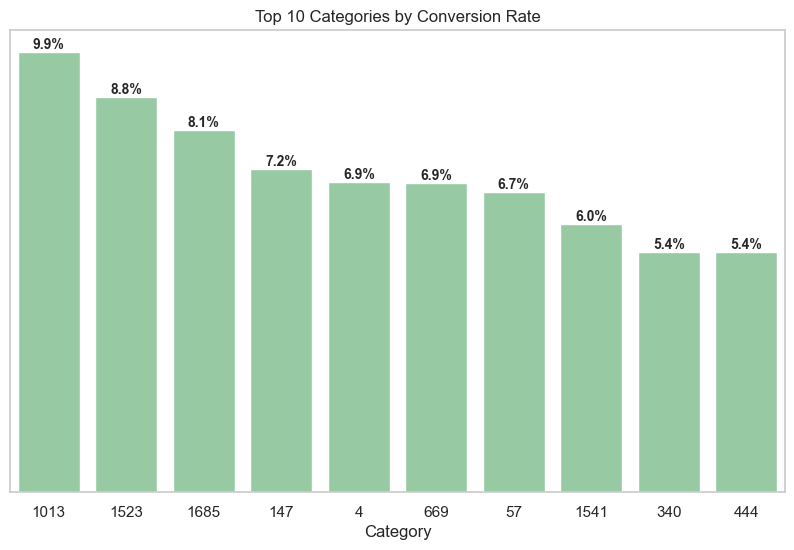

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_top_conversion(df, category_col, event_col, view_label, purchase_label,
                        min_views=50, top_n=10, figsize=(10,6), color='#8FD19E'):

    # Remove trailing .0 by converting to string (skip NaNs)
    df[category_col] = df[category_col].apply(lambda x: str(int(x)) if pd.notnull(x) and isinstance(x, (int, float)) else str(x))

    # Aggregate counts for views and purchases
    counts = (
        df.groupby([category_col, event_col])[event_col]
        .count()
        .unstack(fill_value=0)
        .rename(columns={view_label: 'views', purchase_label: 'purchases'})
    )

    # Remove categories with low views
    counts = counts[counts['views'] >= min_views]

    # Compute conversion rate
    counts['conversion_rate'] = counts['purchases'] / counts['views']

    # Sort by conversion rate and take top N
    top_counts = counts.sort_values('conversion_rate', ascending=False).head(top_n)

    # Plot
    plt.figure(figsize=figsize)
    ax = sns.barplot(
        x=top_counts.index,
        y=top_counts['conversion_rate'],
        color=color
    )
    ax.set_title(f"Top {top_n} Categories by Conversion Rate")
    ax.set_xlabel("Category")
    ax.set_ylabel("")  # remove axis label

    # Remove y-axis lines and ticks
    ax.yaxis.set_visible(False)

    # Annotate bars
    for p in ax.patches:
        ax.annotate(f"{p.get_height():.1%}",
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom',
                    fontsize=10, fontweight='bold')

    plt.show()

# ----------------
# Usage example
# ----------------
plot_top_conversion(
    df,
    category_col='categoryid',  # change to your actual category column name
    event_col='event',
    view_label='view',
    purchase_label='transaction',
    min_views=50,
    top_n=10,
    figsize=(10,6),
    color='#8FD19E'
)


Question 4 Insights

 **Key Observations**
1. **Highest Conversion Rate**  
   - Category **1013** leads with a **9.9%** conversion rate, indicating strong purchase intent from viewers.
   - Category **1523** follows closely with **8.8%**, showing strong performance.

2. **Mid-Tier Converters**  
   - Categories **1685**, **147**, **4**, and **669** maintain conversion rates between **7.2%** and **6.9%**, suggesting moderate but consistent buyer engagement.
   - Category **57** stands at **6.7%**, just slightly below this mid-tier cluster.

3. **Lower Conversion Tier (Still in Top 10)**  
   - Categories **1541**, **340**, and **444** show rates between **6.0%** and **5.4%**. While lower than the leaders, they still perform better than the majority of categories in the dataset.

---

 **Business Implications**
- **Prioritize High-Performers:** Categories **1013** and **1523** should be the focus of **marketing investment, targeted promotions, and personalized recommendations** to maximize ROI.
- **Upsell Potential in Mid-Tier:** Categories **1685**, **147**, **4**, and **669** could be nudged toward higher performance with **bundling offers** or **enhanced product descriptions**.
- **Reassess Low-Performers:** While still strong, the bottom tier of the top 10 (**1541**, **340**, **444**) might benefit from **content optimization** or **pricing strategy adjustments**.

---

 **Recommendation Strategy**
1. **Recommendation Engine Boost:**  
   - Give higher weight to **1013** and **1523** in product recommendations.
   - Surface these categories in **homepage carousels** or **email campaigns**.

2. **Cross-Selling Opportunities:**  
   - Pair **mid-tier products** with top-performing categories to improve their conversion rates.

3. **Conversion Optimization Tests:**  
   - Experiment with **different imagery, call-to-action text, and promotions** for the lower top 10 categories to assess uplift potential.


5. **Do users interact more frequently with items that have richer metadata?**  
   Evaluate the potential of content-based filtering using item features.


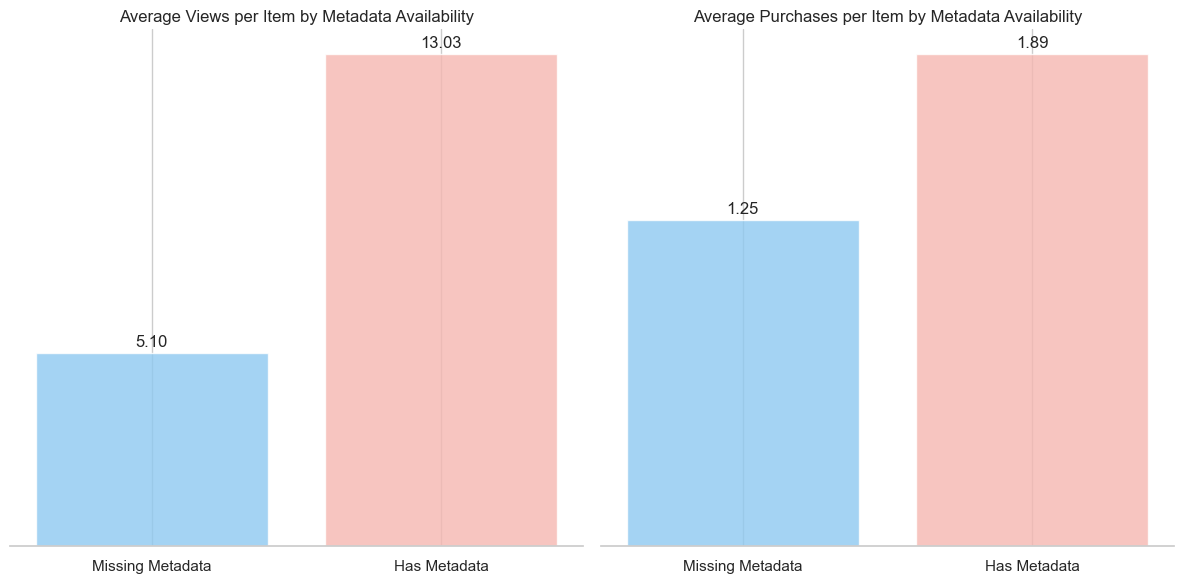

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_views_purchases_side_by_side(df, event_col='event'):
    """
    Compare average views/item and purchases/item for items with richer metadata vs those without.
    Produces side-by-side bar plots without y-axis and raw value labels.
    """

    def get_avg_metric(df, metric_lbl, metric_name):
        # Flag presence of basic metadata
        temp = df.assign(
            has_category=df['categoryid'].notna(),
            has_available=df['available'].notna()
        )

        # Metric count per item
        metric_per_item = (
            temp[temp[event_col].eq(metric_lbl)]
            .groupby('itemid', as_index=False)
            .size()
            .rename(columns={'size': f'{metric_name.lower()}_count'})
        )

        # Item-level metadata presence
        meta_per_item = (
            temp.groupby('itemid', as_index=False)
            .agg(has_category=('has_category', 'max'),
                 has_available=('has_available', 'max'))
        )
        meta_per_item['has_basic_meta'] = meta_per_item['has_category'] & meta_per_item['has_available']

        # Merge and aggregate averages
        merged = metric_per_item.merge(meta_per_item[['itemid', 'has_basic_meta']],
                                       on='itemid', how='left')
        avg_metric = (
            merged.groupby('has_basic_meta')[f'{metric_name.lower()}_count']
            .mean()
            .reset_index()
            .replace({True: 'Has Metadata', False: 'Missing Metadata'})
        )
        return avg_metric

    # Get averages
    avg_views = get_avg_metric(df, 'view', 'Views')
    avg_purchases = get_avg_metric(df, 'transaction', 'Purchases')

    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    for ax, avg_metric, metric_name, color in zip(
        axes,
        [avg_views, avg_purchases],
        ['Views', 'Purchases'],
        [['#8EC9F0', '#F5B7B1'], ['#8EC9F0', '#F5B7B1']]
    ):
        bars = ax.bar(avg_metric['has_basic_meta'],
                      avg_metric[f'{metric_name.lower()}_count'],
                      color=color, alpha=0.8)

        ax.set_title(f'Average {metric_name} per Item by Metadata Availability')
        ax.grid(axis='y', linestyle='--', alpha=0.3)

        # Remove y-axis
        ax.set_yticks([])
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)

        # Annotate with raw numbers
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{height:.2f}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

# Example usage:
analyze_views_purchases_side_by_side(df)


 **Insights for Question 5 — Impact of Metadata on User Interactions**

 **1. Higher Engagement with Metadata**
- Items that include both **category** and **availability** information receive **more than double the average views per item** compared to items missing such metadata.  
  - **Has Metadata:** ~13.03 views/item  
  - **Missing Metadata:** ~5.10 views/item  

 **2. Purchase Activity Benefit**
- Items with richer metadata also see a notable increase in purchase activity.  
  - **Has Metadata:** ~1.89 purchases/item  
  - **Missing Metadata:** ~1.25 purchases/item  

 **3. Implication for Recommendation Strategies**
- These results suggest that **metadata completeness** is strongly correlated with user engagement and purchase conversion.  
- Leveraging metadata-rich items in **content-based filtering** could improve recommendation accuracy and effectiveness, particularly in driving both views and transactions.  

 **4. Business Recommendations**
- **Prioritize metadata completion** (especially category and availability fields) for all items.  
- Integrate **metadata richness** as a scoring factor in recommendation algorithms to boost visibility of items more likely to engage users.  
- Encourage sellers/vendors to supply complete product information through **incentives** or **platform policy requirements**.


6. **What proportion of items receive little or no attention?**  
   Address the cold-start problem and ensure broader catalog coverage.

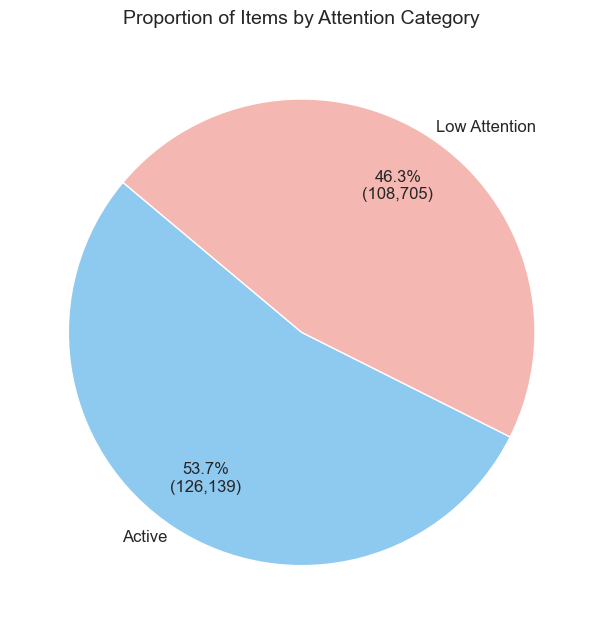

,Attention Category,Count,Proportion (%)
0,Active,126139,53.71
1,Low Attention,108705,46.29


In [49]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_item_attention_pie(df,
                            event_col='event',
                            view_lbl='view',
                            txn_lbl='transaction',
                            active_threshold=2):
    """
    Pie chart of item attention:
      - Active: > active_threshold interactions (views + purchases)
      - Low Attention: <= active_threshold interactions
    Ensures numeric counts to avoid TypeErrors.
    """
    # Count interactions per item (views + transactions)
    interaction_counts = (
        df[df[event_col].isin([view_lbl, txn_lbl])]
        .groupby('itemid')
        .size()
        .reset_index(name='interaction_count')
    )

    # Categorize items
    interaction_counts['Attention Category'] = interaction_counts['interaction_count'] \
        .apply(lambda x: 'Active' if x > active_threshold else 'Low Attention')

    # Aggregate counts
    attention_summary = (
        interaction_counts['Attention Category']
        .value_counts()
        .rename_axis('Attention Category')
        .reset_index(name='Count')
    )

    # --- ensure numeric counts to avoid the 'str' / 'str' error ---
    attention_summary['Count'] = pd.to_numeric(attention_summary['Count'], errors='coerce').fillna(0).astype(int)

    # Compute proportions
    total = attention_summary['Count'].sum()
    attention_summary['Proportion (%)'] = (attention_summary['Count'] / total * 100).round(2)

    # Plot
    fig, ax = plt.subplots(figsize=(6.5, 6.5))

    labels = attention_summary['Attention Category'].tolist()
    sizes  = attention_summary['Count'].tolist()

    # Custom autopct to show both percentage and raw counts
    def autopct_fmt(pct):
        count = int(round(pct * total / 100.0))
        return f'{pct:.1f}%\n({count:,})'

    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        startangle=140,
        autopct=autopct_fmt,
        pctdistance=0.75,
        labeldistance=1.05,
        colors=['#8EC9F0', '#F5B7B1'],
        textprops={'fontsize': 12}
    )

    # Title and layout
    ax.set_title('Proportion of Items by Attention Category', fontsize=14, pad=12)
    # No y-axis in pie charts anyway; nothing extra to remove
    plt.tight_layout()
    plt.show()

    return attention_summary

# Example usage
summary_df = plot_item_attention_pie(df)
summary_df


 Question 6 — Summary of insights

**Insight:**  
The dataset shows a clear skew in interaction distribution across items:

- **Active Items:** 53.7% of items received more than 2 total interactions (views + purchases).  
- **Low Attention Items:** 46.3% of items had only 1–2 interactions.  
- **No Attention Items:** None in this dataset, suggesting that every item received at least one view or purchase.

**Interpretation:**  
While over half of the items are actively engaged with by users, a significant portion (nearly half) of the catalog experiences low engagement. This is a **classic cold-start problem** — new or rarely interacted-with items may struggle to gain visibility in a recommendation system.

**Recommendation:**  
- Introduce **exploration-focused recommendation strategies** such as popularity diversification or catalog coverage metrics to ensure that lesser-known items are surfaced to users.  
- Apply **content-based filtering** or hybrid models that leverage item attributes to recommend underexposed products.  
- Periodically boost visibility of low-attention items through **banner placements, “new arrivals” sections, or personalized email campaigns** to encourage discovery.
